In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore') # for ignoring the warnings

# Sea Surface Temperature
<a id='part1'></a>
Data source: https://www.ncdc.noaa.gov/oisst/data-access

In [ ]:
ds_sst=xr.open_dataset('sst_java_sea.nc', chunks={'time':1})
ds_sst

---
---

### Exercise
> 1. Use `.sel()` on the SST dataset to select the data on September 2010
> 2. Use `.sel()` to slice the data from June 2012 to June 2013. Average the time using `.mean()` and plot it.

In [ ]:
# Q1
ds_sst.sel(time='2010-09-30').sst

In [ ]:
# Q2
ds_sst.sel(time=slice('2012-06', '2013-06')).mean('time').sst.plot()

---
---

### What if we want to focus on a certain region? For example, East of Sumatra?
Let's say we want to focus on 104-107˚E and 0-4˚S.

In [ ]:
east_sumatra_sst=ds_sst.sel(lat=slice(-4,0), lon=slice(104,107)).sst
east_sumatra_sst

In [ ]:
# it looks like this
east_sumatra_sst.isel(time=15).plot()

Let's say we are interested in the variability of SST in this region, then just average the latitude and longitude dimensions!

In [ ]:
east_sumatra_sst.mean(['lat','lon']).plot()

---
---

### Exercise
> Now do the same but for South of Kalimantan, here's the boundaries: 3-5˚S, 110-116˚E.
> 1. First plot, using any time that you want, just to check if the area is correct (you can use `.isel()` for this).
> 2. Average the latitude and longitude, and then plot the SST variability from 2003-2016.

In [ ]:
# make a new variable 'south_kalimantan' here first
south_kalimantan_sst=ds_sst.sel(lat=slice(-5,-3), lon=slice(110,116)).sst
south_kalimantan_sst

In [ ]:
# Q1

south_kalimantan_sst.isel(time=22).plot()

In [ ]:
# Q2
south_kalimantan_sst.mean(['lat','lon']).plot()

#### Here's the prettier version of Q2's answer:

In [ ]:
fig, ax = plt.subplots(dpi=300, figsize=[11,3])

ax.plot(south_kalimantan_sst.time,
        south_kalimantan_sst.mean(['lat','lon']), 
        marker='o', markersize=4)

for_xticks = pd.date_range('2003','2017',freq='YS')
ax.set_xticks(for_xticks)
ax.set_xticklabels([str(i)[:4] for i in for_xticks])

ax.grid(axis='x', alpha=0.5)

ax.set_ylabel('SST [˚C]')
ax.set_title('SST Variability in South of Kalimantan')

---
---

### Groupby

In [ ]:
monthly_clim_sst = ds_sst.groupby('time.month').mean().sst
season_sst = ds_sst.groupby('time.season').mean().sst

In [ ]:
# Monthly climatology
monthly_clim_sst

In [ ]:
# Seasonal
season_sst

---
---

### Exercise
> 1. Use `.sel()` to get the July data from `monthly_clim_sst` and plot it. 
> 2. Use `.sel()` to get the December-February data from `season_sst` and plot it. 

In [ ]:
# Q1
monthly_clim_sst.sel(month=7).plot()

In [ ]:
# Q2
season_sst.sel(season='DJF').plot()

---
---

#### Here's the prettier version of Q2's answer above:

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
region=[101,117,-9,1]
ax.set_extent(region)

season_sst.sel(season='DJF').plot.contourf(cmap='RdYlBu_r', 
                                           levels=np.arange(28,29.3,0.1), 
                                           extend='both',
                                           cbar_kwargs={'label':'SST [˚C]',
                                                       'shrink':0.8,
                                                       'pad':0.02})
ax.set_title('Dec-Feb Climatology')

---
---

### Exercise
> Try to recreate like figure above but for March to May. What would you need to change to make the figure better?

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

season_sst.sel(season='MAM').plot.contourf(cmap='RdYlBu_r', 
                                           levels=np.arange(29,29.8,0.1), 
                                           extend='both',
                                           cbar_kwargs={'label':'SST [˚C]',
                                                       'shrink':0.8,
                                                       'pad':0.02})
ax.set_title('Mar-May Climatology')

---
---

In [ ]:
%%time

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                      ncols=2, nrows=2, dpi=300, figsize=[12,7])

axes_flatted = axes.flat
extent=[102,117,-9,1]
season_order = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(len(season_sst.season)):
    axes_flatted[i].coastlines()
    axes_flatted[i].set_extent(extent)
    axes_flatted[i].add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    
    im=season_sst.sel(season=season_order[i]).plot.contourf(ax=axes_flatted[i],
                                                   levels=np.arange(27,30.01,0.25), 
                                                   extend='both', add_colorbar=False,
                                                   cmap='RdYlBu_r')
    
    
    axes_flatted[i].set_title(season_order[i])

cbar =  fig.colorbar(im, ax=axes, extend='both', shrink=0.6, pad=0.02) 
cbar.set_label('SST [˚C]')

# Wind dataset
<a id='part2'></a>

Data source: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

In [ ]:
ds_wind=xr.open_dataset('wind_java_sea.nc', 
                        chunks={'time':1})
ds_wind

We have the zonal velocity (u) and meridional velocity (v). First we try to approximate the magnitude by using this simple equation:

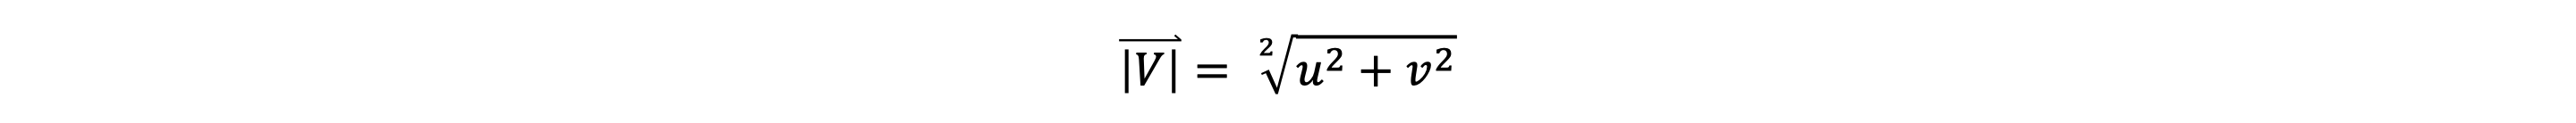

---
---

### Exercise
>1.  Calculate the wind speed using the equation above. Assign it to a variable called `wind_speed`.
>2.  Plot the wind speed at time index = 15 (use `.isel()`). 

In [ ]:
# Q1
wind_speed = (ds_wind.u10**2 + ds_wind.v10**2)**0.5

In [ ]:
# Q2
wind_speed.isel(time=15).plot()

---
---

#### Assigning as a new variable into the dataset

In [ ]:
ds_wind['wind_speed'] = wind_speed

In [ ]:
ds_wind

# now wind speed is part of the dataset

---
---

### Exercise
> Let's again analyze the South Kalimantan region
>1.  Create a variable `south_kalimantan_wind`. The boundaries are: 3-5˚S, 110-116˚E (slice the area by using `.sel()`).
>2.  Average the latitude and longitude and plot `u10`, `v10` and `wind_speed` in the same figure.

In [ ]:
# Q1
south_kalimantan_wind=ds_wind.sel(latitude=slice(-3,-5), longitude=slice(110,116))
south_kalimantan_wind

In [ ]:
# Q2
south_kalimantan_wind.mean(['latitude','longitude']).u10.plot()
south_kalimantan_wind.mean(['latitude','longitude']).v10.plot()
south_kalimantan_wind.mean(['latitude','longitude']).wind_speed.plot()

#### Here's the prettier version of Q2's answer:

In [ ]:
fig, ax = plt.subplots(dpi=300, figsize=[12,4])

# zonal wind (u) 
ax.plot(south_kalimantan_wind.time,
        south_kalimantan_wind.u10.mean(['latitude','longitude']), label='u10')

# meridional wind (v)
ax.plot(south_kalimantan_wind.time,
        south_kalimantan_wind.v10.mean(['latitude','longitude']), label='v10')

# magnitude 
ax.plot(south_kalimantan_wind.time,
        south_kalimantan_wind.wind_speed.mean(['latitude','longitude']), label='Magnitude')

for_xticks = pd.date_range('2003','2017',freq='YS')
ax.set_xticks(for_xticks)
ax.set_xticklabels([str(i)[:4] for i in for_xticks])

ax.grid(axis='x', alpha=0.5)

ax.set_ylabel('Wind Speed [m s$^{-1}$]')
ax.set_title('Wind Speed Variability in South of Kalimantan')

ax.legend()

---
---

## Seasonal Variability

In [ ]:
seasonal_wind = ds_wind.groupby('time.season').mean('time')
seasonal_wind

In [ ]:
seasonal_wind.wind_speed.sel(season='JJA').plot(vmin=0, vmax=7)

---
---

### Exercise
> Plot the wind speed during DJF but with the same colorbar value as figure above.

In [ ]:
# answer
seasonal_wind.wind_speed.sel(season='DJF').plot(vmin=0, vmax=7)

---
---

## Streamplot
Check the docs for more information: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.streamplot.html

In [ ]:
%%time

fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

ax.streamplot(seasonal_wind.longitude.values, 
              seasonal_wind.latitude.values,
              seasonal_wind.sel(season='DJF').u10.values,
              seasonal_wind.sel(season='DJF').v10.values)

ax.set_title('Wind Direction in December-February')

---
---

### Exercise
> Replicate figure above but for June-August (don't forget to change the title).

In [ ]:
# answer
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

ax.streamplot(seasonal_wind.longitude.values, 
              seasonal_wind.latitude.values,
              seasonal_wind.sel(season='JJA').u10.values,
              seasonal_wind.sel(season='JJA').v10.values)

ax.set_title('Wind Direction in June-August')

---
---

### With magnitude as color

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

strm=ax.streamplot(x=seasonal_wind.longitude, 
                   y=seasonal_wind.latitude,
                   u=seasonal_wind.sel(season='JJA').u10.values,
                   v=seasonal_wind.sel(season='JJA').v10.values,
                   color=seasonal_wind.sel(season='JJA').wind_speed.values, 
                   cmap='turbo',
                   density=1,
                   linewidth=1)

ax.set_title('Wind Speed in June-August')
cbar=fig.colorbar(strm.lines, pad=0.02, extend='both')
cbar.set_label('Wind Speed [m s$^{-1}$]')

## Combining with SST

In [ ]:
%%time

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                      ncols=2, nrows=2, dpi=300, figsize=[16,14])

axes_flatted = axes.flat
extent=[102,117,-9,1]
season_order = ['DJF', 'MAM', 'JJA', 'SON']
plt.subplots_adjust(left=0.5,right=1,bottom=0.68,top=1)

for i in range(len(season_sst.season)):
    axes_flatted[i].coastlines()
    axes_flatted[i].set_extent(extent)
    axes_flatted[i].add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    
    im=season_sst.sel(season=season_order[i]).plot.contourf(ax=axes_flatted[i],
                                                   levels=np.arange(27,30.01,0.25), 
                                                   extend='both', add_colorbar=False,
                                                   cmap='RdYlBu_r')
    
    strm=axes_flatted[i].streamplot(x=seasonal_wind.longitude, 
                                    y=seasonal_wind.latitude,
                                    u=seasonal_wind.sel(season=season_order[i]).u10.values,
                                    v=seasonal_wind.sel(season=season_order[i]).v10.values,
                                    color=seasonal_wind.sel(season=season_order[i]).wind_speed.values,
                                    cmap='Greys',
                                    density=1,
                                    linewidth=0.6)
    
    cbar_wind=fig.colorbar(strm.lines, ax=axes_flatted[i], extend='both', shrink=0.9)
    cbar_wind.set_label('Wind Speed [m s$^{-1}$]')
    axes_flatted[i].set_title(season_order[i])

cbaxes = fig.add_axes([0.58,0.64,0.3,0.015])
cbar =  fig.colorbar(im, ax=axes, cax=cbaxes, extend='both', orientation='horizontal') 
cbar.set_label('SST [˚C]')

# Chlorophyll
<a id='part3'></a>
#### Data source: https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdMH1chlamday.html

### *Note: To reduce the size, the chlorophyll dataset has been linearly interpolated to larger spatial resolution, therefore the results might differ from the youtube version of this tutorial.

In [ ]:
ds_chl=xr.open_dataset('chlorophyll_java_sea.nc', chunks={'time':1})
ds_chl

#### Checking the details of the dataset

In [ ]:
ds_chl.chlorophyll.attrs

In [ ]:
# you can check each attribute
ds_chl.chlorophyll.attrs['references']

---
---

### Exercise
> Use `.sel()` on the `ds_chl` to select the data on September 2010

In [ ]:
# answer
ds_chl.sel(time='2010-09-16').chlorophyll.plot(robust=True)

__The better version of the answer above:__

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, 
                       dpi=300,
                       figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

ds_chl.sel(time='2010-09-16').chlorophyll.plot(cmap='PiYG',
                                               robust=True, 
                                               cbar_kwargs={'shrink':0.8,
                                                            'pad':0.02})

ax.set_title('Chlorophyll Distribution in September 2010')

---
---

## The same analysis for South of Kalimantan

In [ ]:
# make a new variable 'south_kalimantan_chl' here first
south_kalimantan_chl=ds_chl.sel(latitude=slice(-3,-5), longitude=slice(110,116)).chlorophyll
south_kalimantan_chl

In [ ]:
plt.figure(figsize=[9,3], dpi=300)

south_kalimantan_chl.mean(['longitude', 'latitude']).plot()

In [ ]:
# groupby into seasonal
clim_season_chl = ds_chl.groupby('time.season').mean().chlorophyll

In [ ]:
%%time

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                         ncols=2, nrows=2, 
                         dpi=300, figsize=[12,7])

axes_flatted = axes.flat
extent=[102,117,-9,1]
season_order = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(len(clim_season_chl.season)):
    axes_flatted[i].coastlines()
    axes_flatted[i].set_extent(extent)
    axes_flatted[i].add_feature(cfeature.LAND, facecolor='0.8')
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    
    im=clim_season_chl.sel(season=season_order[i]).plot(ax=axes_flatted[i],
                                           levels=np.arange(0,2.700001,0.3), 
                                           extend='max', add_colorbar=False,
                                          cmap='PiYG')
    
    axes_flatted[i].set_title(season_order[i])

cbar =  fig.colorbar(im, ax=axes, extend='max', shrink=0.6, pad=0.02) 

### Combining with wind data

In [ ]:
%%time

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                      ncols=2, nrows=2, dpi=300, figsize=[16,14])

axes_flatted = axes.flat
extent=[102,117,-9,1]
season_order = ['DJF', 'MAM', 'JJA', 'SON']
plt.subplots_adjust(left=0.5,right=1,bottom=0.68,top=1)

for i in range(len(season_sst.season)):
    axes_flatted[i].coastlines()
    axes_flatted[i].set_extent(extent)
    axes_flatted[i].add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    
    im=clim_season_chl.sel(season=season_order[i]).plot(ax=axes_flatted[i],
                                           levels=np.arange(0,2.700001,0.3), 
                                           extend='max', add_colorbar=False,
                                          cmap='PiYG')
    
    strm=axes_flatted[i].streamplot(x=seasonal_wind.longitude, 
                                    y=seasonal_wind.latitude,
                                    u=seasonal_wind.sel(season=season_order[i]).u10.values,
                                    v=seasonal_wind.sel(season=season_order[i]).v10.values,
                                    color=seasonal_wind.sel(season=season_order[i]).wind_speed.values,
                                    cmap='Greys',
                                    density=1,
                                    linewidth=0.6)
    
    cbar_wind=fig.colorbar(strm.lines, ax=axes_flatted[i], extend='both', shrink=0.9)
    cbar_wind.set_label('Wind Speed [m s$^{-1}$]')
    axes_flatted[i].set_title(season_order[i])

cbaxes = fig.add_axes([0.58,0.64,0.3,0.015])
cbar =  fig.colorbar(im, ax=axes, cax=cbaxes, extend='max', orientation='horizontal') 
cbar.set_label('Chlorophyll Concentration [mg m$^{-3}$]')

# Interesting Findings about South Kalimantan Sea
<a id='part4'></a>
So far we already have: `south_kalimantan_sst`, `south_kalimantan_wind`, `south_kalimantan_chl`

### Correlation of SST and Wind

In [ ]:
fig, ax = plt.subplots(dpi=300, figsize=[11,3])
south_kalimantan_sst.mean(['lat', 'lon']).plot(ax=ax, c='b')
ax.set_ylabel('SST', color='b')

ax2 = ax.twinx()
south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude']).plot(ax=ax2, c='r')
ax2.set_ylabel('Wind Speed', color='r')

You can observe a significant anti-correlation!!!

In [ ]:
from scipy import stats

In [ ]:
R1, p1 = stats.pearsonr(south_kalimantan_sst.mean(['lat', 'lon']), 
                            south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude']))

In [ ]:
R1, p1

In [ ]:
x = south_kalimantan_sst.mean(['lat', 'lon'])
y = south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude'])

# for the trend line

polyfit = np.polyfit(x, y, 1) 
function = np.poly1d(polyfit)
new_y = function(x)

# plotting the scatter plot
    
fig,ax = plt.subplots(figsize=(8,3.5), dpi=300)
plot=ax.scatter(x, y, s=10, c=x.time)

ax.set_xlabel('SST [˚C]')
ax.set_ylabel('Wind Speed [m s$^{-1}$]')

# plotting the trend line
ax.plot(x, new_y, linestyle = '-', color = 'k') # cara sendiri

# Display R and p value:
plt.text(0.9, 0.95, f"R = {R1:.4f}", horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)

# Adding the colorbar
cbar = plt.colorbar(plot, label='time')
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y'))

# Adding the title
ax.set_title('Corr. of Wind Speed and SST in South Kalimantan Sea')

### Correlation of Chlorophyll and Wind

In [ ]:
fig, ax = plt.subplots(dpi=300, figsize=[11,3])
south_kalimantan_chl.mean(['latitude', 'longitude']).plot(ax=ax, c='g')
ax.set_ylabel('Chlorophyll', color='g')

ax2 = ax.twinx()
south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude']).plot(ax=ax2, c='r')
ax2.set_ylabel('Wind Speed', color='r')

for_xticks = pd.date_range('2003','2017',freq='YS')
ax.set_xticks(for_xticks)
ax.set_xticklabels([str(i)[:4] for i in for_xticks]);

In [ ]:
R2, p2 = stats.pearsonr(south_kalimantan_chl.mean(['latitude', 'longitude']), 
                        south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude']))

In [ ]:
R2, p2

In [ ]:
x = south_kalimantan_chl.mean(['latitude', 'longitude'])
y = south_kalimantan_wind.wind_speed.mean(['latitude', 'longitude'])

# for the trend line

polyfit = np.polyfit(x, y, 1) 
function = np.poly1d(polyfit)
new_y = function(x)

# plotting the scatter plot
    
fig,ax = plt.subplots(figsize=(8,3.5), dpi=300)
plot=ax.scatter(x, y, s=10, c=x.time)

ax.set_xlabel('Chlorophyll Concentration [mg m$^{-3}$]')
ax.set_ylabel('Wind Speed [m s$^{-1}$]')

# plotting the regression line
ax.plot(x, new_y, linestyle = '-', color = 'k') # cara sendiri

# Display R and p value:
plt.text(0.9, 0.95, f"R = {R2:.4f}", horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)


# Adding the colorbar
cbar = plt.colorbar(plot, label='time')
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y'))

# Adding the title
ax.set_title('Corr. of Wind Speed and Chlorophyll Concentration in South Kalimantan Sea')

### Correlation of Chlorophyll and SST

In [ ]:
fig, ax = plt.subplots(dpi=300, figsize=[11,3])
south_kalimantan_chl.mean(['latitude', 'longitude']).plot(ax=ax, c='g')
ax.set_ylabel('Chlorophyll', color='g')

ax2 = ax.twinx()
south_kalimantan_sst.mean(['lat', 'lon']).plot(ax=ax2, c='b')
ax2.set_ylabel('SST', color='b')

In [ ]:
R3, p3 = stats.pearsonr(south_kalimantan_chl.mean(['latitude', 'longitude']), 
                              south_kalimantan_sst.mean(['lat', 'lon']))

In [ ]:
R3, p3

In [ ]:
x = south_kalimantan_chl.mean(['latitude', 'longitude'])
y = south_kalimantan_sst.mean(['lat', 'lon'])

# for the trend line

polyfit = np.polyfit(x, y, 1) 
function = np.poly1d(polyfit)
new_y = function(x)

# plotting the scatter plot
    
fig,ax = plt.subplots(figsize=(8,3.5), dpi=300)
plot=ax.scatter(x, y, s=10, c=x.time)

ax.set_xlabel('Chlorophyll Concentration [mg m$^{-3}$]')
ax.set_ylabel('SST [˚C]')

# plotting the regression line
ax.plot(x, new_y, linestyle = '-', color = 'k') # cara sendiri

# Display R and p value:
plt.text(0.9, 0.95, f"R = {R3:.4f}", horizontalalignment='center',
     verticalalignment='center',
     transform=ax.transAxes)

# Adding the colorbar
cbar = plt.colorbar(plot, label='time')
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y'))

# Adding the title
ax.set_title('Corr. of SST and Chlorophyll Concentration in South Kalimantan Sea')

# Argo Gridded Field
<a id='part5'></a>
Data source: https://www.seanoe.org/data/00412/52367/

This section will analyze the results of [this](https://www.researchgate.net/publication/328117492_Sea_temperature_variability_during_IOD_Indian_Ocean_Dipole_events_in_West_Sumatra_waters_by_using_argo_float_data) paper:

In [ ]:
ds_argo = xr.open_dataset('argo_west_sumatra_sea.nc', chunks={'time':1})
ds_argo

# now we have depth dimension!

In [ ]:
# checkin what the data looks like

ds_argo.temp.sel(depth=10, time='2010-09-15').plot()

# surface temp

In [ ]:
# lets try temp at 300m

ds_argo.temp.sel(depth=300, time='2010-09-15').plot()

In [ ]:
# lets plot vertical profile of temperature along the equator

ds_argo.temp.sel(lat=0, time='2010-09-15', method='nearest').plot(y='depth', yincrease=False, cmap='turbo')

## Temperature profile during IOD

In [ ]:
# first, slice the September-November each year
son2009 = ds_argo.sel(time=slice('2009-09', '2009-11')) # neutral phase
son2010 = ds_argo.sel(time=slice('2010-09', '2010-11')) # negative IOD phase
son2011 = ds_argo.sel(time=slice('2011-09', '2011-11')) # positive IOD phase

We will try to focus on the 5˚S to 5˚N latitude band. And cut the area east of Sumatra Island (longitude>100˚E).

In [ ]:
# lets try to plot one of them
fig, ax = plt.subplots(dpi=300, figsize=[10,3])
latnya = [-2.5,2.5]
lonnya = [80,100]

son2009.temp.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 'time']).plot.contourf(yincrease=False, 
                                                                                    y='depth',
                                                                                    cmap='RdBu_r',
                                                                                    levels=np.arange(12,30,1))
# here is the contour
son2009.temp.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 'time']).plot.contour(yincrease=False, 
                                                                      y='depth',
                                                                      levels=np.arange(12,30,1),
                                                                      colors='k',
                                                                      linewidths=0.5).clabel(fmt='%.f',
                                                                                             fontsize=5.5)

In [ ]:
# three of them all together to compare
fig, axes = plt.subplots(nrows=3, dpi=300, figsize=[9,8], constrained_layout=True)

latnya = [-5,5]
lonnya = [80,100]

# 2009
son2009.temp.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 'time']).plot.contourf(ax=axes[0],
                                                                                    yincrease=False, 
                                                                                    y='depth',
                                                                                    cmap='RdBu_r',
                                                                                    levels=np.arange(12,30,1),
                                                                                   add_colorbar=False)
son2009.temp.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 'time']).plot.contour(ax=axes[0],
                                                                                   yincrease=False, 
                                                                      y='depth',
                                                                      levels=np.arange(12,30,1),
                                                                      colors='k',
                                                                      linewidths=0.5).clabel(fmt='%.f',
                                                                                             fontsize=5.5)

# 2010
son2010.temp.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 'time']).plot.contourf(ax=axes[1],
                                                                                    yincrease=False, 
                                                                                    y='depth',
                                                                                    cmap='RdBu_r',
                                                                                    levels=np.arange(12,30,1),
                                                                                   add_colorbar=False)
son2010.temp.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 
                                                      'time']).plot.contour(ax=axes[1],
                                                                            yincrease=False, 
                                                                            y='depth',
                                                                            levels=np.arange(12,30,1),
                                                                            colors='k',
                                                                            linewidths=0.5).clabel(fmt='%.f',
                                                                                                   fontsize=5.5)


# 2011
im=son2011.temp.sel(lat=slice(latnya[0],latnya[1]),
                    lon=slice(lonnya[0],lonnya[1])).mean(['lat', 
                                                          'time']).plot.contourf(ax=axes[2],
                                                                                 yincrease=False, 
                                                                                 y='depth',
                                                                                 cmap='RdBu_r',
                                                                                 levels=np.arange(12,30,1),
                                                                                 add_colorbar=False)
son2011.temp.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 
                                                      'time']).plot.contour(ax=axes[2],
                                                                            yincrease=False,
                                                                            y='depth',
                                                                            levels=np.arange(12,30,1),
                                                                            colors='k',
                                                                            linewidths=0.5).clabel(fmt='%.f',
                                                                                                   fontsize=5.5)

# add 1 colorbar for all
cbar = fig.colorbar(im, ax=axes, shrink=0.6)

axes[0].set_title('2009 (IOD Neutral)')
axes[1].set_title('2010 (IOD Negative)')
axes[2].set_title('2011 (IOD Positive)')

for ax in axes:
    ax.set_xlabel('')

#### Explanation:

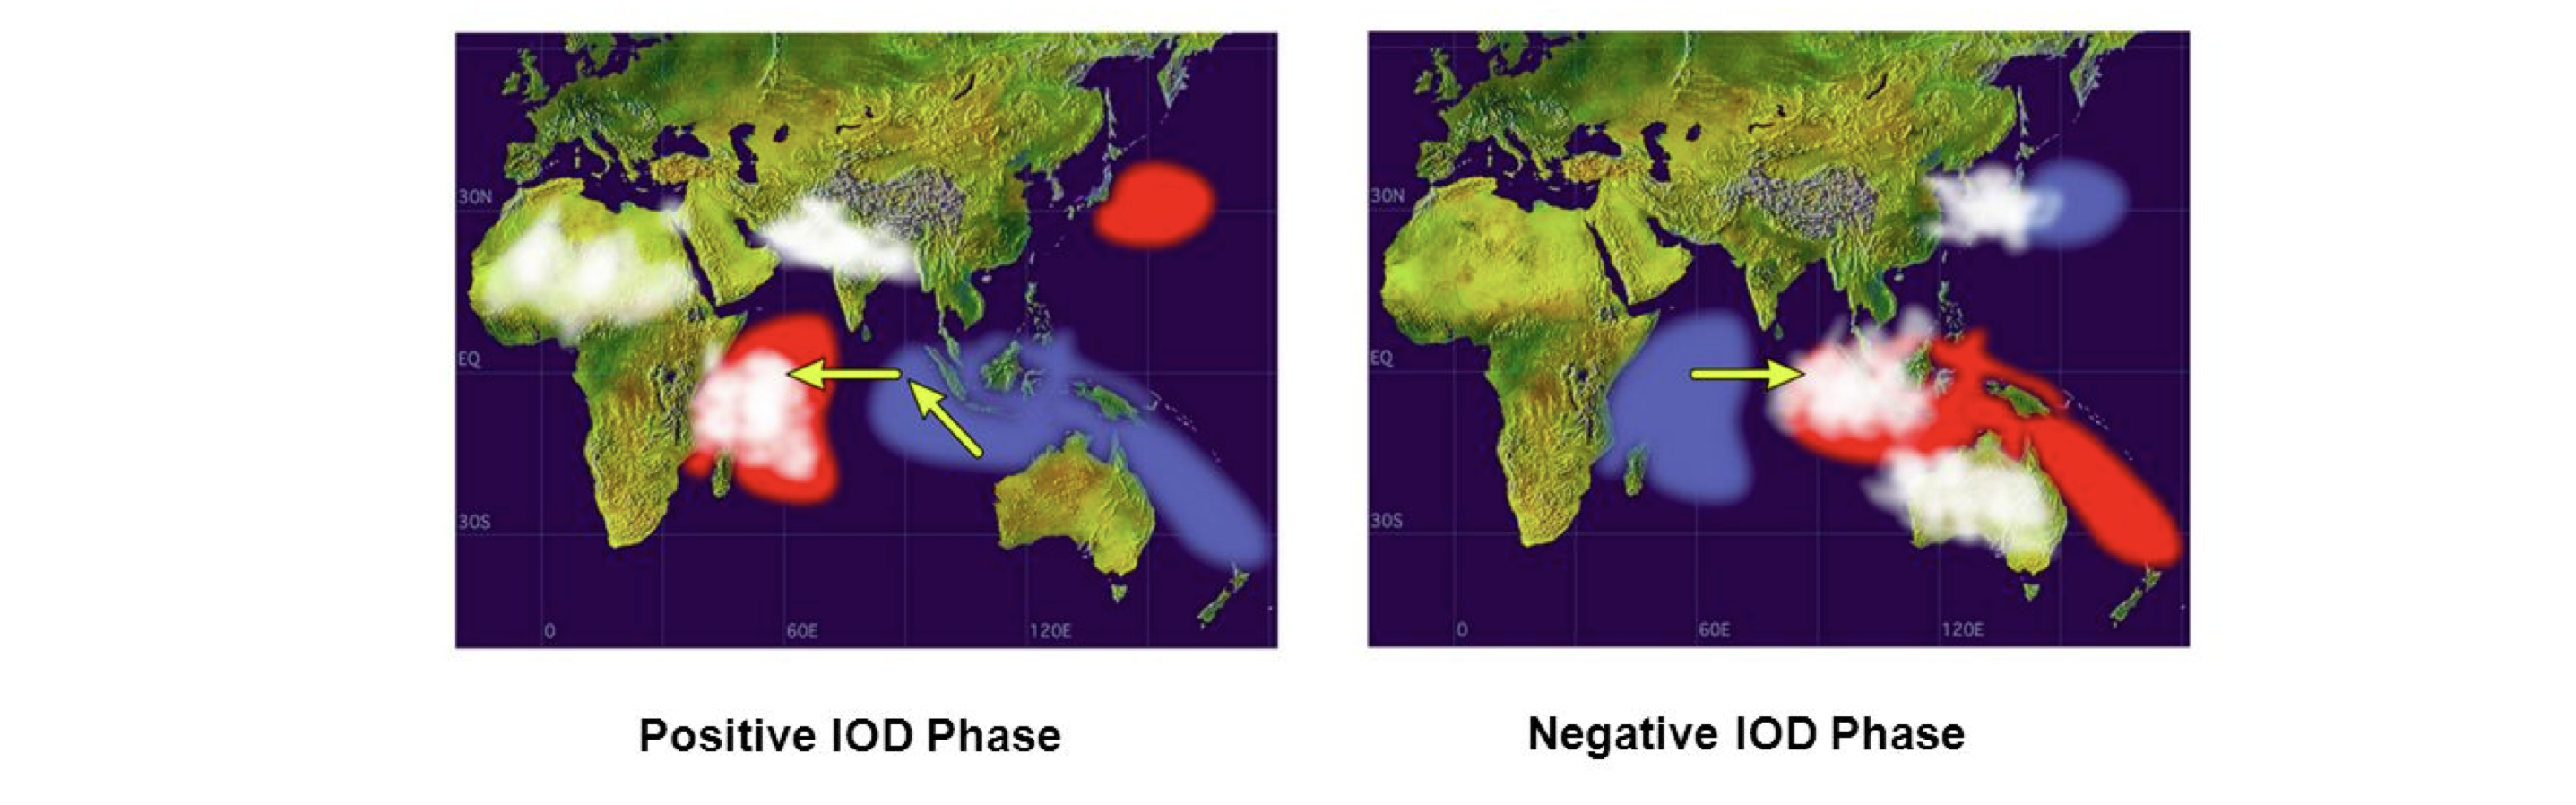
Source: Jamstec

### Another example (salinity and pot density):

In [ ]:
# salinity
fig, ax = plt.subplots(dpi=300, figsize=[10,3])
latnya = [-5,5]
lonnya = [80,100]

son2009.sal.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 
                                                      'time']).plot.contourf(yincrease=False, 
                                                                             y='depth',
                                                                             cmap='Spectral_r',
                                                                             levels=np.arange(33.75,35.25,0.1))

In [ ]:
# potential density
fig, ax = plt.subplots(dpi=300, figsize=[10,3])
latnya = [-5,5]
lonnya = [80,100]

son2009.sigma0.sel(lat=slice(latnya[0],latnya[1]),
                lon=slice(lonnya[0],lonnya[1])).mean(['lat', 
                                                      'time']).plot.contourf(yincrease=False, 
                                                                             y='depth',
                                                                             cmap='BrBG',
                                                                             levels=np.arange(21,26.6,0.5))